In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

import eval_results
# import ANN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
df = pd.read_pickle("cleanDataDraft1.pkl")

In [21]:
df = df[df.child > 0]

In [174]:
df['haschild'] = df.child > 0

In [175]:
df

,sex,mstatus,child,age,birth,sp,own,veh,sloc,dwellrate,...,mtgds,heloc,helump,hiedinch,white,black,american_indian,asian,hawaiian,haschild
0,1,4,1,48.0,57.0,2.0,2.0,2,3,7,...,4.0,2,2,0,1,0,0,0,0,True
1,2,1,1,45.0,57.0,2.0,1.0,2,2,8,...,8.0,2,2,0,1,0,0,0,0,True
2,1,1,2,49.0,57.0,1.0,1.0,3,3,10,...,7.0,2,2,1,1,0,0,0,0,True
3,1,4,0,70.0,57.0,2.0,1.0,0,3,8,...,2.0,2,2,0,1,0,0,0,0,False
4,2,6,0,24.0,57.0,2.0,2.0,2,2,10,...,2.0,2,2,0,1,0,0,0,0,False
5,1,1,0,76.0,57.0,2.0,2.0,0,1,8,...,2.0,2,2,0,1,0,0,0,0,False
6,1,1,2,40.0,57.0,2.0,2.0,1,4,9,...,2.0,2,2,1,1,0,0,0,0,True
7,2,3,0,71.0,57.0,2.0,1.0,1,1,10,...,1.0,2,2,0,1,0,0,0,0,False
8,2,6,0,24.0,57.0,2.0,1.0,1,1,8,...,2.0,2,2,0,1,0,0,0,0,False
9,1,4,0,63.0,57.0,2.0,1.0,1,2,8,...,2.0,2,2,0,1,0,0,0,0,False


In [176]:
imp = IterativeImputer(missing_values=np.nan)
x = df.drop('hiedinch', axis=1)
y = df.hiedinch
x = imp.fit_transform(x)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [130]:
np.isnan(x).sum()

0

In [26]:
clf = RandomForestClassifier(class_weight={0:1, 1:8})

In [27]:
clf.fit(X_train, y_train)

C:\Users\conne\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 8},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [28]:
clf.score(X_test, y_test)

0.78125

In [29]:
y_true = y

y_pred = clf.predict(x)

In [30]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [31]:
print(tp, fp)

900 75


In [32]:
conf_matrix2 = np.array([[tp, fp],[fn, tn]], dtype=np.int_)

In [33]:
conf_matrix2

array([[ 900,   75],
       [ 241, 2941]])

In [34]:
weights = np.array([[1300, -500], [0, 0]])
weights

array([[1300, -500],
       [   0,    0]])

In [35]:
np.sum(np.multiply(conf_matrix2, weights))

1132500

In [18]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8859
           1       0.93      0.78      0.85      1141

    accuracy                           0.97     10000
   macro avg       0.95      0.89      0.92     10000
weighted avg       0.97      0.97      0.97     10000



(array([6188.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         812.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

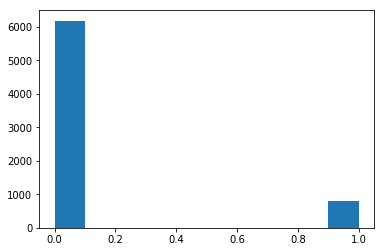

In [43]:
plt.hist(y_train)

(array([2671.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         329.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

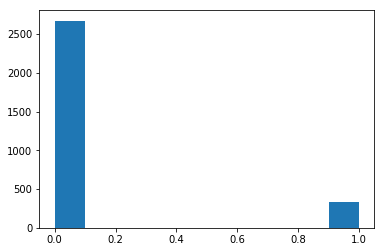

In [44]:
plt.hist(y_test)

In [45]:
conf_matrix

NameError: name 'conf_matrix' is not defined

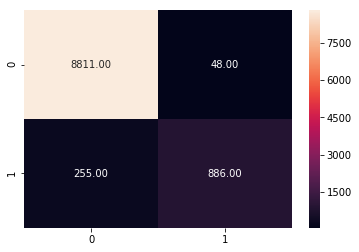

In [47]:
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='.2f')

In [178]:
cost_FP = -500
cost_FN = 0
cost_TP = 1300
cost_TN = 0
cost_mat = np.array([cost_FP * np.ones(df.shape[0]), cost_FN * np.ones(df.shape[0]), 
                     cost_TP * np.ones(df.shape[0]), 
                     cost_TN * np.ones(df.shape[0])]).T

In [179]:
cost_mat

array([[-500.,    0., 1300.,    0.],
       [-500.,    0., 1300.,    0.],
       [-500.,    0., 1300.,    0.],
       ...,
       [-500.,    0., 1300.,    0.],
       [-500.,    0., 1300.,    0.],
       [-500.,    0., 1300.,    0.]])

In [180]:
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
kf.get_n_splits(x)
X_train_l, X_test_l = [], []
y_train_l, y_test_l = [], []
cost_mat_train_l, cost_mat_test_l = [], []
for train_index, test_index in kf.split(x, y):
    X_train_l.append(x[train_index, :])
    X_test_l.append(x[test_index, :])
    y_train_l.append(y.iloc[train_index])
    y_test_l.append(y.iloc[test_index])
    cost_mat_train_l.append(cost_mat[train_index, :])
    cost_mat_test_l.append(cost_mat[test_index, :])

In [181]:
y_pred_train_lr_probas, y_pred_test_lr_probas = [], []
y_pred_train_lr, y_pred_test_lr = [], []
for i, (X_train, X_test, y_train) in enumerate(zip(X_train_l, X_test_l, y_train_l)):
    print('Logistic regression ' + str(i + 1) + '/' + str(n_splits) + ' ...')
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_train_lr_probas.append(np.round(lr.predict_proba(X_train)[:, 1], 3))
    y_pred_test_lr_probas.append(np.round(lr.predict_proba(X_test)[:, 1], 3))
    y_pred_train_lr.append(lr.predict(X_train))
    y_pred_test_lr.append(lr.predict(X_test))

Logistic regression 1/5 ...


C:\Users\conne\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression 2/5 ...


C:\Users\conne\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression 3/5 ...


C:\Users\conne\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression 4/5 ...


C:\Users\conne\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression 5/5 ...


C:\Users\conne\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [182]:
# y_pred_train_ann_probas, y_pred_test_ann_probas = [], []
# y_pred_train_ann, y_pred_test_ann = [], []
# for i, (X_train, X_test, y_train) in enumerate(zip(X_train_l, X_test_l, y_train_l)):
#     print('ANN ' + str(i + 1) + '/' + str(n_splits) + ' ...')
#     clf = ANN.clf(indput_dim=X_train.shape[1], dropout=0.2)
#     clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     clf.fit(X_train, y_train, batch_size=50, epochs=2, verbose=1)
#     y_pred_train_ann_proba = np.round(clf.predict(X_train, verbose=1), 3).reshape(-1)
#     y_pred_test_ann_proba = np.round(clf.predict(X_test, verbose=1), 3).reshape(-1)
#     y_pred_train_ann_probas.append(y_pred_train_ann_proba)
#     y_pred_test_ann_probas.append(y_pred_test_ann_proba)
#     y_pred_train_ann.append((y_pred_train_ann_proba > 0.5).astype(int).reshape(-1))
#     y_pred_test_ann.append((y_pred_test_ann_proba > 0.5).astype(int).reshape(-1))

In [217]:
cost_mat_train_l[0][:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [202]:
(1 - y_pred_train_lr_probas[0]) * cost_mat_train_l[0][:, 3] + (y_pred_train_lr_probas[0] * cost_mat_train_l[0][:, 1])

array([0., 0., 0., ..., 0., 0., 0.])

In [244]:
y_pred_train_lr_mc, y_pred_test_lr_mc = [], []
for y_train_proba, y_test_proba, cm_train, cm_test in zip(y_pred_train_lr_probas,\
                            y_pred_test_lr_probas, cost_mat_train_l, cost_mat_test_l):
#     cost_0 = (1 - y_train_proba) * cm_train[:, 3] + y_train_proba * cm_train[:, 1] # No cost
    cost_1 = (1 - y_train_proba) * cm_train[:, 0] + y_train_proba * cm_train[:, 2]
    y_pred_train_lr_mc.append((cost_1 > 0).astype(int))        
#     cost_0 = (1 - y_test_proba) * cm_test[:, 3] + y_test_proba * cm_test[:, 1]
    cost_1 = (1 - y_test_proba) * cm_test[:, 0] + y_test_proba * cm_test[:, 2]
    y_pred_test_lr_mc.append((cost_1 > 0).astype(int))

In [254]:
y_pred_train_lr_mc[0]

array([0, 0, 1, ..., 0, 0, 0])

In [242]:
summ = 0
for item in y_pred_test_lr_mc:
    summ += sum(item)

In [243]:
summ

1000

In [156]:
len(y_pred_test_lr_mc[1])

2000

In [157]:
len(y_pred_test_lr_mc[2])

2000

In [158]:
len(y_pred_test_lr_mc[3])

2000

In [159]:
len(y_pred_test_lr_mc[4])

1999

In [154]:
len(x)

10000

In [137]:
np.save('results/cost_mat_train_l', cost_mat_train_l)
np.save('results/cost_mat_test_l', cost_mat_test_l)
np.save('results/y_pred_train_lr.npy', y_pred_train_lr)
np.save('results/y_pred_test_lr.npy', y_pred_test_lr)
np.save('results/y_pred_train_lr_probas.npy', y_pred_train_lr_probas)
np.save('results/y_pred_test_lr_probas.npy', y_pred_test_lr_probas)
np.save('results/y_pred_train_lr_mc.npy', y_pred_train_lr_mc)
np.save('results/y_pred_test_lr_mc.npy', y_pred_test_lr_mc)

In [255]:
def evaluate(name, y_train, y_test, y_pred_train, y_pred_test, cost_mat_train, cost_mat_test):
    data = zip(y_train, y_test, y_pred_train, y_pred_test, cost_mat_train, cost_mat_test)
    pos_train, pos_test = [], []
    f1_train, f1_test = [], []
    cost_savings_train, cost_savings_test = [], []
    for y_train, y_test, y_pred_train, y_pred_test, cost_mat_train, cost_mat_test in data:
        pos_train.append(np.round(y_pred_train.sum() / y_pred_train.shape[0], 3))
        pos_test.append(np.round(y_pred_test.sum() / y_pred_test.shape[0], 3))
        f1_train.append(np.round(f1_score(y_train, y_pred_train), 3))
        f1_test.append(np.round(f1_score(y_test, y_pred_test), 3))
        max_cost_train = 0
        cost_train = costs(y_train, y_pred_train, cost_mat_train)
        cost_savings_train.append(np.round((max_cost_train - cost_train) / max_cost_train, 3))
        max_cost_test = 0
        cost_test = costs(y_test, y_pred_test, cost_mat_test)
        cost_savings_test.append(np.round((max_cost_test - cost_test) / max_cost_test, 3))
    print('--------------------')
    print(name)
    print('Positives train     ' + str(np.round(np.mean(pos_train), 3)) +
          ', individual: ' + str(pos_train))
    print('Positives test:     ' + str(np.round(np.mean(pos_test), 3)) + 
          ', individual: ' + str(pos_test))
    print('F1-score train:     ' + str(np.round(np.mean(f1_train), 3)) +
          ', individual: ' + str(f1_train))
    print('F1-score test:      ' + str(np.round(np.mean(f1_test), 3)) +
          ', individual: ' + str(f1_test))
    print('Cost savings train: ' + str(np.round(np.mean(cost_savings_train), 3)) + 
          ', individual: ' + str(cost_savings_train))
    print('Cost savings test:  ' + str(np.round(np.mean(cost_savings_test), 3)) + 
          ', individual: ' + str(cost_savings_test))

In [256]:
def max_costs(y_true, cost_mat):
    cost_all_neg = sum(y_true * cost_mat[:, 1] + (1 - y_true) * cost_mat[:, 3])
    return cost_all_neg

In [258]:
def costs(y_true, y_pred, cost_mat):
    cost = y_true * ((1 - y_pred) * cost_mat[:, 1] + y_pred * cost_mat[:, 2]) + (1 - y_true) * (y_pred * cost_mat[:, 0] + (1 - y_pred) * cost_mat[:, 3])
    return np.round(sum(cost), 2)

In [259]:
from sklearn.metrics import f1_score
evaluate('Logistic Regression', y_train_l, y_test_l, y_pred_train_lr, 
                          y_pred_test_lr, cost_mat_train_l, cost_mat_test_l)

TypeError: Series cannot perform the operation *